## Backpropagation
La Backpropagation e' il processo con la quale vengono aggiornati i pesi e i bias della rete. <br>
Lo scopo dell'aggiornamento è quello di minimizzare l'errore commesso dalla rete nella fase di predizione.<br>
Per capire come funziona la backpropagation, supponiamo di lavorare con un solo neurone. <br>
Il neurone oggetto di studio è formato da:
- 3 input 
- 3 pesi
- 1 bias
- ReLU come funzione di attivazione

In [1]:
import numpy as np

x = [ 1.0 , - 2.0 , 3.0 ] # Valori in input
w = [ - 3.0 , - 1.0 , 2.0 ] # Pesi del neurone
b = 1.0 # bias

# Calcolo in uscita dal neurone
z = sum(np.array(x) * np.array(w).T) + b

# Applicazione della ReLU
y = max(z, 0)
print(y)

6.0


Come minimizzare l'errore?<br>
Il processo di correzione dell'errore è un processo iterativo che si svolge in diverse epoche. <br>
Un'idea può essere quella di muoversi a piccoli passi sulla superficie della funzione di output ricalcolando ed otimizzando ad ogni passo i pesi della rete.<br>
La derivata (gradiente nel caso di più variabili) è quell'operazione che ci consente di muoverci a piccoli passi per capire quanto una variabile influenzi l'output di una funzione (nel nostro caso vogliamo capire come pesi e bias influenzino l'errore al fine di variarli).<br><br>
Si può partire calcolando proprio la derivata della ReLU.
<br>
La funzione ReLU può essere scritta in una versione semplificata come: 
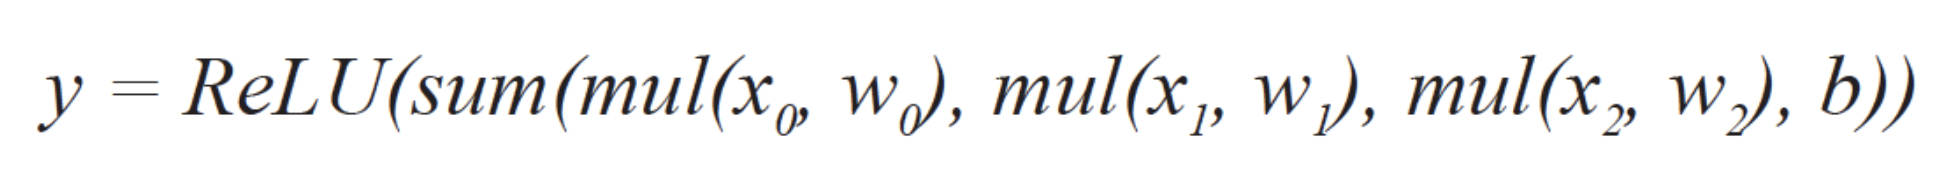
Come calcolare la derivata della ReLU?<br>
Può essere utilizzata la <b>chain rule</b>, che consente di calcolare la derivata di funzioni composte.


### Chain Rule
Definizione:<br><i>la derivata di una funzione composta è il prodotto tra la derivata della funzione esterna, avente come argomento la funzione interna, e la derivata della funzione interna</i>
<center>$D[f(g(x))] = f'(g(x))\cdot g'(x)$</center>
<br>
Perchè è importante la Chain Rule? <br>
Dobbiamo immaginare che la rete neurale è una combinazione di più funzioni, che a partire da un input composto da più features valutano un output. <br>
La chain rule è importante perchè è proprio la regola che cercavamo che ci permette di calcolare il gradiente:<br>
la regola dimostra che possiamo valutare la derivata dell'ultimo livello come la combinazione di tutti gli step intermedi e in ogni step intermedio possiamo valutare la derivata del livello corrente prendendo in considerazione il valore della derivata del livello successivo. <br>

#### Considerazione importante
In questo esempio base stiamo considerando un solo neurone. <br>
Cosa ci aspettiamo alla fine di questa introduzione? <br>
Di minimizzare il valore in output della ReLU variando pesi e bias.<br><br>
Prendiamo inoltre in considerazione la definizione della chain rule:
<center>$D[f(g(x))] = f'(g(x))\cdot g'(x)$</center><br>
Si noti che siamo in grado di calcolare $g'(x)$, ma non conosciamo il valore di $f'(g(x))$.<br>$f'(g(x))$ non è altro che il valore della derivata del layer successivo a quello in esame.<br>
In questo tutorial lavorando con un solo neurone non conosciamo tale valore ma nella realtà dei fatti esso potrà essere calcolato prendendo in considerazione l'errore in output della rete. <br>
A scopo puramente dimostrativo consideriamo quindi:

- $f'(g(x)) = 1$
- $g(x) = ReLU(z)$


### Derivata della funzione ReLU
E' dimostrabile che la derivata della funzione ReLU è definita come:
<center>$
  f(x) =
    \begin{cases}
      0 & \text{if x <= 0}\\
      1 & \text{if x > 0} 
    \end{cases}       
$</center>

In [2]:
# Calcolo del gradiente

# Derivata del livello successivo (ricordiamo che è settato a 1 come scopo puramente illustrativo)
dvalue = 1.0 

# Derivata della ReLU (livello corrente)
# Ricordiamo che z è la somma delle moltiplicazioni
drelu_dz = dvalue * ( 1. if z > 0 else 0. )
print (drelu_dz)

1.0


Perchè sarà importante <i>drelu_dz</i>? <br>
Sarà utile per calcolare il gradiente della somma, in quanto questo corrisponde al <i>livello successivo</i>

### Derivata parziale della funzione Sum
E' dimostrabile che la derivata parziale dell'operazione di somma è sempre 1:
<center>$f(x,y)=x+1$</center><br>
<center>$\frac{d}{dx}f(x,y)=1$</center><br>
<center>$\frac{d}{dy}f(x,y)=1$</center><br>

In [3]:
# Calcolo del gradiente

# La derivata del livello successivo è pari a drelu_dz

# Derivata del livello corrente rispetto a xw0, xw1, xw2 e b (sono le variabili della sum)
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1

# Applicazione della chain rule
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db

### Derivata del prodotto
E' dimostrabile che la derivata del prodotto $ x\cdot y$ è pari a $y$ quando viene calcolata la derivata rispetto a $x$, $x$ altrimenti:
<center>
    $f(x,y)=x \cdot y$<br><br>
    $\frac{d}{dx}f(x,y)=y$<br><br>
    $\frac{d}{dy}f(x,y)=x$<br><br>
</center>

In [4]:
# Calcolo del gradiente

# La derivata del livello successivo è pari a dsum_dxw0, dsum_dxw1 e dsum_dxw2

# La derivata del livello corrente segue la regola sopra esplicitata:
dmul_dx0 = w[ 0 ] 
dmul_dw0 = x[ 0 ] 
dmul_dx1 = w[ 1 ] 
dmul_dw1 = x[ 1 ] 
dmul_dx2 = w[ 2 ] 
dmul_dw2 = x[ 2 ] 

# Applicazione della chain rule
drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0
drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1
drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2

Cosa abbiamo fatto fin ora? <br>
Abbiamo misurato l'impatto delle variabili x0, x1, x2, w0, w1, w2 e b sulla funzione di attivazione ReLU.<br>
Queste ci danno un indicazione di come esse devono essere modificate per diminuire il valore di ReLU.<br>
Chiaramente non siamo interessati a modificare x0, x1 e x2 in quanto sono input fissi: saremo interessati a modificare solamente i valori di w0, w1, w2 e b.

### Ottimizzazione
L'ottimizzazione è quel processo per cui vengono aggiornati i pesi e i bias per ridurre l'errore prodotto dalla rete. <br> Nel nostro caso verrà ridotto il valore in uscita della ReLU. <br><br>
Come effettuare l'aggiornamento?
Semplicemente sottraendo il valore del gradiente al peso d'interesse. <br>
Attenzione: tipicamente non viene sottratto dal peso tutto il valore del gradiente, ma una frazione di questo. <br>
La frazione di gradiente sottratta dalla variabile in oggetto è chiamata <b>Learning Rate</b>.
Si può notare che la funzione tenderà allo 0 tanto più velocemente quanto più alto sarà il valore del Learning Rate.


In [5]:
# Calcolo della relu iniziale
x = np.array([ 1.0 , - 2.0 , 3.0 ]) # Valori in input
w = np.array([ - 3.0 , - 1.0 , 2.0 ]) # Pesi del neurone
b = 1.0 # bias

z = sum(x*w) + b
y = max (z, 0 )


dw = np.array([drelu_dw0, drelu_dw1, drelu_dw2]) # gradienti dei pesi
db = drelu_db # gradiente del bias (uno in questo caso perchè abbiamo un solo neurone)
lr = 0.01 # Valore del learning rate
epochs = 5

for epoch in range(0, epochs): 
    y_last = y
    
    # Aggiornamento dei pesi e del bias (backpropagation)
    w += - lr * dw
    b += - lr*db
    
    # Calcolo della relu
    z = sum(x*w) + b
    y = max (z, 0 )
    
    print(f'Epoca {epoch+1}: {y_last:.2f} -> {y:.2f}')
    




Epoca 1: 6.00 -> 5.85
Epoca 2: 5.85 -> 5.70
Epoca 3: 5.70 -> 5.55
Epoca 4: 5.55 -> 5.40
Epoca 5: 5.40 -> 5.25


Notiamo che drelu_dx0 può essere calcolato come
> drelu_dx0 = dvalue * (1. if z Z 0 else 0.) * w[0]

Questo ci consentirà di semplificare i calcoli nei paragrafi successivi e nell'implementazione effettiva della backpropagation.

### Backpropagation compelta
Fin ora abbiamo effettuato la backpropagation con un solo neurone.<br>
Proviamo ora ad estendere il calcolo su una rete più grande composta da più layer e neuroni.<br>
Nel nostro caso supponiamo di avere in input un batch di 3 elementi composti da 4 features:
- Poichè abbiamo un layer di 3 neuroni e 4 features, avremmo una matrice di pesi di 4 x 3 (4 feature x 3 elementi)
- Come dimostrato in precedenza, il gradiente dell'output rispetto all'input è dato dalla moltiplicazione tra il peso, la derivata del livello successivo e la derivata della ReLU

In [6]:
# 3 neuroni: significa 3 set di pesi
# 4 feature per input: significa 4 pesi per neurone
# Per questo abbiamo una matrice 4x4
weights = np.array(
    [[ 0.2 , 0.8 , - 0.5 , 1 ],
    [ 0.5 , - 0.91 , 0.26 , - 0.5 ],
    [ - 0.26 , - 0.27 , 0.17 , 0.87 ]]).T

# Input (batch di 3 per 4 features)
inputs = np.array(
        [[ 1 , 2 , 3 , 2.5 ],
        [ 2. , 5. , - 1. , 2 ],
        [ - 1.5 , 2.7 , 3.3 , - 0.8 ]
    ])

# 3 Bias poichè abbiamo 3 neuroni
biases = [1., 2., 3.]

# Forward pass
layer_outputs = np.dot(inputs, weights) + biases # Dense layer
relu_outputs = np.maximum( 0 , layer_outputs) # ReLU activation

# Gradiente del livello successivo (ricordiamo che i valori sono inventati e a puro scopo dimostrativo)
dvalues = np.array([[ 1. , 1. , 1. ],
    [ 2. , 2. , 2. ],
    [ 3. , 3. , 3. ]])

# Derivata della relu
# Mette a 0 se il valore è < 0
drelu = relu_outputs.copy()
drelu[layer_outputs <= 0 ] = 0 

# Gradiente dei pesi
dweights = np.dot(inputs.T, drelu)

# Gradiente dei bias
dbiases = np.sum(drelu, axis = 0 , keepdims = True )


# Update dei parametri 
weights += - 0.001 * dweights
biases += - 0.001 * dbiases

## Softmax e Categorical Cross Entropy
Abbiamo capito fin qui come calcolare il gradiente per il livello corrente conoscendo il gradiente del livello successivo.<br>
Rimane solo un punto aperto: come calcoliamo il valore <i>dvalue</i> che fin qui abbiamo inizializzato casualmente? <br>
Il valore <i>dvalue</i> in una rete neurale reale (almeno in quella di questi esempi, fatta da una Softmax come funzione di attivazione per il layer di output e con un calcolo dell'errore basato sulla Categorical Cross Entropy) può essere calcolato come spiegato nei paragrafi successivi.

### Gradiente della Softmax
E' dimostrabile che il gradiente della funzione softmax è pari a:
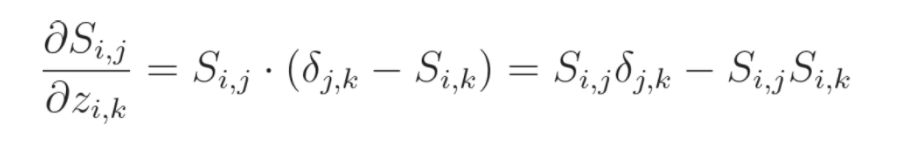
Non è scopo di questo tutorial dimostrare i passaggi che portano alla formula di cui sopra.
Il risultato del gradiente della funzione softmax è chiamato <i>Matrice Jacobiana</i>. Questa è un array di derivate parziali. 

In [7]:
import numpy as np
# Supponiamo il seguente output della funzione softmax
softmax_output = [ 0.7 , 0.1 , 0.2 ]
softmax_output = np.array(softmax_output).reshape( - 1 , 1 )

# Kronecker delta: matrice con cella uguale a 1 quando gli input sono uguali, altrimenti 0
print ( 'Kronecker delta\n', np.eye(softmax_output.shape[ 0 ]), '\n')

# Lato sinistro della derivata 
print ( 'Left side of the derivate \n',softmax_output * np.eye(softmax_output.shape[ 0 ]), '\n')
# In maniera più efficiente è possibile calcolarla così
np.diagflat(softmax_output)

# Lato destro della derivata
print ('Right side of the derivate \n', np.dot(softmax_output, softmax_output.T), '\n')

# Risultato finale

print ( 'Final Result \n',np.diagflat(softmax_output) - np.dot(softmax_output, softmax_output.T), '\n')


Kronecker delta
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

Left side of the derivate 
 [[0.7 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.2]] 

Right side of the derivate 
 [[0.49 0.07 0.14]
 [0.07 0.01 0.02]
 [0.14 0.02 0.04]] 

Final Result 
 [[ 0.21 -0.07 -0.14]
 [-0.07  0.09 -0.02]
 [-0.14 -0.02  0.16]] 



### Categorical Cross Entropy e Softmax
Può essere difficile lavorare con il gradiente della Categorical Cross Entropy sia dal punto di vista didattico che da quello computazionale.<br>
Tuttavia nel nostro caso siamo interessati ad un output che è una combinazione tra la Categorical Cross Entropy e la Softmax.<br>
E' dimostrabile che il gradiente della Categorical Cross Entropy quando preceduta da una funzione di attivazione Softmax è pari a:
<center>$\frac{dL_i}{dz_{i,k}}=\hat{y}_{i,k} - y_{i,k}$</center>

Il tutto è molto semplice: riusciamo a calcolare il valore <i>dvalue</i> come differenza tra il valore in output della softmax e il valore reale (ground truth).<br>
Si precisa che:
- $i$ corrisponde al valore $i-esimo$ dell'output (dipende dal numero di classi in output)
- $k$ rappresenta l'input $k-esimo$ (dipende dalla dimensione del batch in input)